In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
Df= pd.read_csv(r"C:\Users\wwwia\Downloads\Zomato data .csv")

In [38]:
!pip install seaborn --upgrade

In [8]:
print(Df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

Df['rate']=Df['rate'].apply(handleRate)
print(Df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [15]:
Df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


There is no null values in data

Conclusion: The majority of the restaurants fall into the dining category.

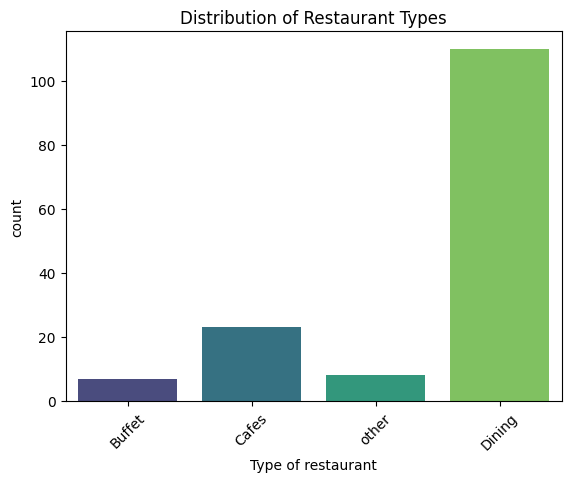

In [43]:
sns.countplot(
    data=Df, 
    x='listed_in(type)', 
    hue='listed_in(type)', 
    palette='viridis', 
    legend=False  
)
plt.xlabel("Type of restaurant")
plt.xticks(rotation=45)
plt.title("Distribution of Restaurant Types")
plt.show()

Text(0, 0.5, 'Votes')

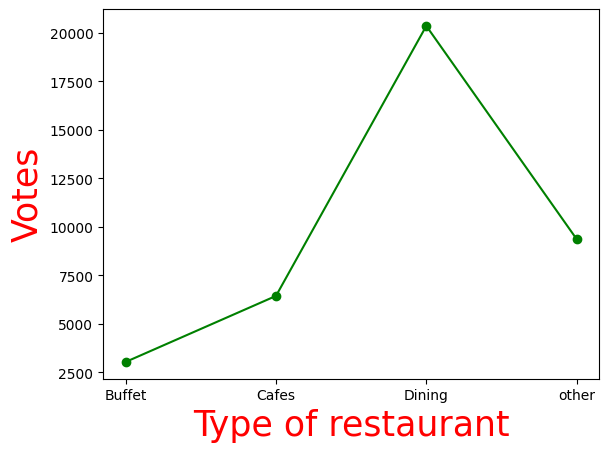

In [47]:
grouped_data = Df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=25)
plt.ylabel("Votes", c="red", size=25)


Conclusion: Dining restaurants are preferred by a larger number of individuals.

In [50]:
max_votes = Df['votes'].max()
restaurant_with_max_votes = Df.loc[Df['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

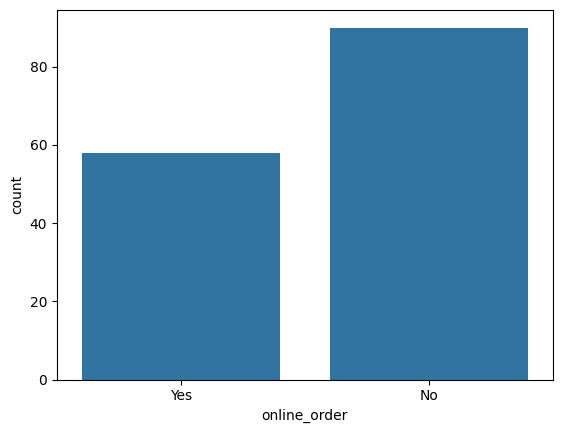

In [52]:
sns.countplot(x=Df['online_order'])


Conclusion: This suggests that a majority of the restaurants do not accept online orders.

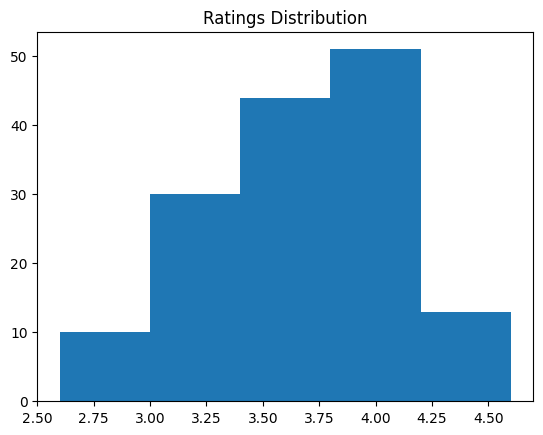

In [53]:
plt.hist(Df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()


# Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

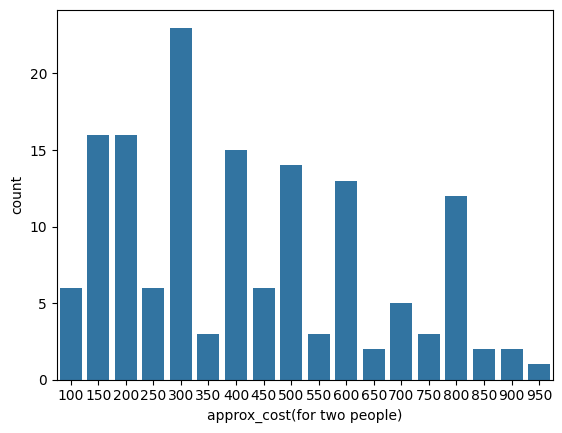

In [56]:
couple_data=Df['approx_cost(for two people)']
sns.countplot(x=couple_data)


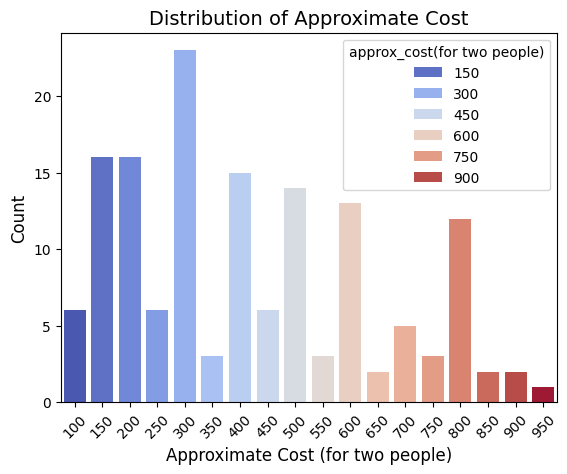

In [60]:
couple_data = Df['approx_cost(for two people)']

# Creating a countplot with colors
sns.countplot(x=couple_data,hue=couple_data, palette='coolwarm')  
plt.xlabel("Approximate Cost (for two people)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  
plt.title("Distribution of Approximate Cost", fontsize=14)
plt.show()

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

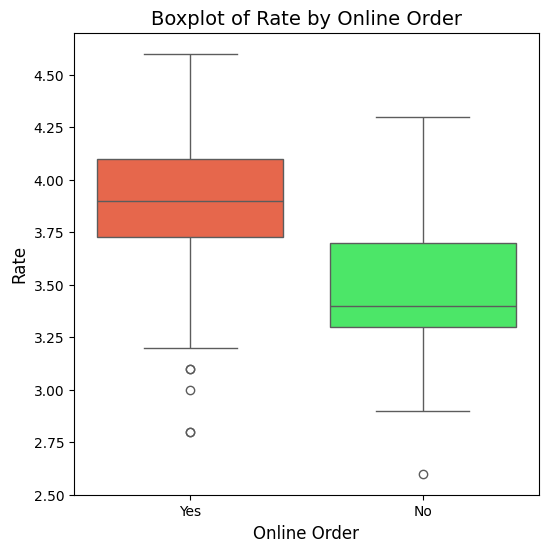

In [63]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=Df, hue='online_order', palette=['#FF5733', '#33FF57'], legend=False)
plt.xlabel("Online Order", fontsize=12)
plt.ylabel("Rate", fontsize=12)
plt.title("Boxplot of Rate by Online Order", fontsize=14)
plt.show()

CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

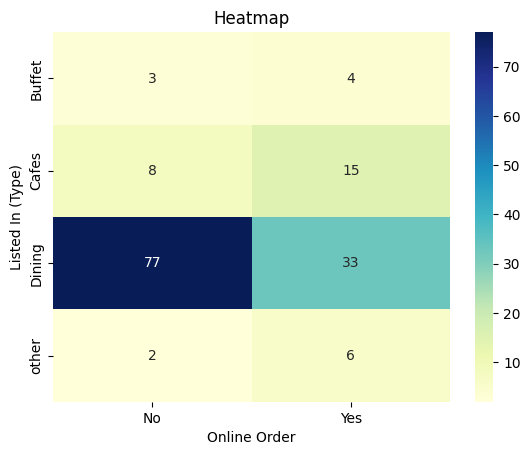

In [66]:
pivot_table = Df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.